### Data preprocess 

In [2]:
import pandas as pd
import csv
import networkx as nx
import numpy as np
import math
from networkx.algorithms.community.quality import modularity

In [3]:
# read in all collaboration files and node file 
path_edge = './egdes_new.tsv'
path_node = './nodes_new.tsv'
path_0006 = './collaborations0006.tsv'
path_0013 = './collaborations0013.tsv'
path_0019 = './collaborations0019.tsv'
path_0713 = './collaborations0713.tsv'
path_1419 = './collaborations1419.tsv'

all_edges = pd.read_csv(path_edge, sep='\t')
all_nodes = pd.read_csv(path_node, sep= '\t')
collaborations_0006 = pd.read_csv(path_0006, sep='\t', names= ['Id1','Id2','Count'])
collaborations_0013 = pd.read_csv(path_0013, sep='\t', names= ['Id1','Id2','Count'])
collaborations_0019 = pd.read_csv(path_0019, sep='\t', names= ['Id1','Id2','Count'])
collaborations_0713 = pd.read_csv(path_0713, sep='\t', names= ['Id1','Id2','Count'])
collaborations_1419 = pd.read_csv(path_1419, sep='\t', names= ['Id1','Id2','Count'])

In [4]:
# the len of all edges is 1553
len(collaborations_1419)

1553

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


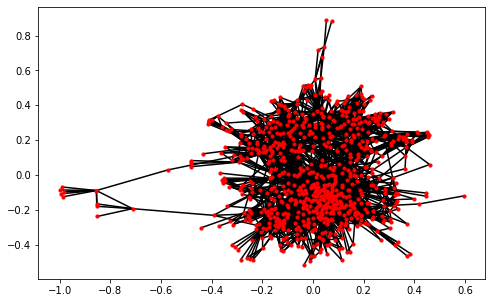

In [6]:
# draw the all_edges graph
from pandas import DataFrame
from matplotlib import pyplot as plt
df_all_edges = DataFrame(all_edges)
df_all_nodes = DataFrame(all_nodes)
G = nx.from_pandas_edgelist(df_all_edges,'Id1','Id2',edge_attr= 'Count')
fig, ax = plt.subplots(figsize=(8,5))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,ax, node_size=10,width=1.5,with_labels = False)

In [7]:
# Transform dataframe and construct graph
df_0006 = DataFrame(collaborations_0006)
G_0006 = nx.from_pandas_edgelist(df_0006,'Id1','Id2',edge_attr= 'Count')
df_0013 = DataFrame(collaborations_0013)
G_0013 = nx.from_pandas_edgelist(df_0013,'Id1','Id2',edge_attr= 'Count')
df_0019 = DataFrame(collaborations_0019)
G_0019 = nx.from_pandas_edgelist(df_0019,'Id1','Id2',edge_attr= 'Count')
df_0713 = DataFrame(collaborations_0713)
G_0713 = nx.from_pandas_edgelist(df_0713,'Id1','Id2',edge_attr= 'Count')
df_1419 = DataFrame(collaborations_1419)
G_1419 = nx.from_pandas_edgelist(df_1419,'Id1','Id2',edge_attr= 'Count')

In [8]:
#get edge table with edge attribute
nx.get_edge_attributes(G,'Count')

{('GbLB9aAAAAAJ', 'No-GJRQAAAAJ'): 2,
 ('GbLB9aAAAAAJ', '1o_wrqsAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'L-pC28sAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'tyYtUNIAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'BECu7wYAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'OQ4t3U4AAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'sr1HGtUAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'SRUYLREAAAAJ'): 1,
 ('GbLB9aAAAAAJ', 'eYVXgAoAAAAJ'): 11,
 ('GbLB9aAAAAAJ', 'WwadVmIAAAAJ'): 2,
 ('GbLB9aAAAAAJ', 'Q6WtK04AAAAJ'): 1,
 ('No-GJRQAAAAJ', 'klpr-t0AAAAJ'): 1,
 ('No-GJRQAAAAJ', '1o_wrqsAAAAJ'): 5,
 ('No-GJRQAAAAJ', 'BECu7wYAAAAJ'): 1,
 ('No-GJRQAAAAJ', 'Ay_j7dUAAAAJ'): 6,
 ('No-GJRQAAAAJ', 'F2jhvIoAAAAJ'): 1,
 ('No-GJRQAAAAJ', '-goooIUAAAAJ'): 4,
 ('No-GJRQAAAAJ', 'sr1HGtUAAAAJ'): 2,
 ('No-GJRQAAAAJ', 'qvKcICQAAAAJ'): 3,
 ('No-GJRQAAAAJ', 'WwadVmIAAAAJ'): 28,
 ('No-GJRQAAAAJ', 'SRUYLREAAAAJ'): 7,
 ('No-GJRQAAAAJ', 'Q6WtK04AAAAJ'): 2,
 ('No-GJRQAAAAJ', 'eYVXgAoAAAAJ'): 3,
 ('qYbgZYgAAAAJ', 'yOJ8F4gAAAAJ'): 1,
 ('qYbgZYgAAAAJ', 'wSPgTVwAAAAJ'): 1,
 ('qYbgZYgAAAAJ', 'CWj6pVcAAAAJ'): 1,
 ('qYbgZYg

### Degree distribution

In [9]:
# get unique_degrees, frequences for degree distribution of time evoltion graphs
# get degrees for each node
deg = dict(nx.degree(G))
degrees = [val for val in deg.values()]
# get all unique degrees and the count for each degree
unique_degrees, frequences = np.unique(degrees, return_counts=True)

deg_0006 = dict(nx.degree(G_0006))
degrees_0006 = [val for val in deg_0006.values()]
# get all unique degrees and the count for each degree
unique_degrees_0006, frequences_0006 = np.unique(degrees_0006, return_counts=True)

deg_0013 = dict(nx.degree(G_0013))
degrees_0013 = [val for val in deg_0013.values()]
# get all unique degrees and the count for each degree
unique_degrees_0013, frequences_0013 = np.unique(degrees_0013, return_counts=True)

deg_0019 = dict(nx.degree(G_0019))
degrees_0019  = [val for val in deg_0019.values()]
# get all unique degrees and the count for each degree
unique_degrees_0019, frequences_0019 = np.unique(degrees_0019, return_counts=True)

deg_0713 = dict(nx.degree(G_0713))
degrees_0713 = [val for val in deg_0713.values()]
# get all unique degrees and the count for each degree
unique_degrees_0713, frequences_0713 = np.unique(degrees_0713, return_counts=True)

deg_1419 = dict(nx.degree(G_1419))
degrees_1419 = [val for val in deg_1419.values()]
# get all unique degrees and the count for each degree
unique_degrees_1419, frequences_1419 = np.unique(degrees_1419, return_counts=True)

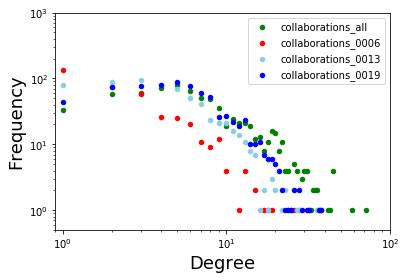

In [10]:
# the degree distribution for All collabrations,collabrations between 2000-2006, 2000-2013, 2000-2019
fig = plt.figure()
ax1 = fig.add_subplot(111)
l = ax1.scatter(unique_degrees, frequences,s=20, color = 'green', label="collaborations_all")
l1 = ax1.scatter(unique_degrees_0006, frequences_0006,s=20, color = 'red', label="collaborations_0006")
l2 = ax1.scatter(unique_degrees_0013, frequences_0013,s=20, color = 'skyblue', label="collaborations_0013")
l3 = ax1.scatter(unique_degrees_0019, frequences_0019,s=20, color = 'blue', label="collaborations_0019")
#plot on log scale with proper x, y range for display purpose
plt.yscale('log')
plt.xscale('log')
plt.ylim([.5,1000])
plt.xlim([.9,100])
# # plt.scatter(unique_degrees, frequences,color = 'green', label="collaborations_all")
# # plt.scatter(unique_degrees1, frequences1,color = 'red', label="collaborations_bt_04_09")
# # plt.scatter(unique_degrees1, frequences1,color = 'skyblue', label="collaborations_bt_10_14")
# # plt.scatter(unique_degrees1, frequences1,color = 'blue', label="collaborations_after_14")

plt.legend(handles = [l, l1, l2, l3], loc='upper right')

plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.show()

G have 748 nodes,3498 of edges. Its average shortest path and clustering coefficient is 3.971418651432826,0.5156161910351511.

G_0006 have 206 nodes,426 of edges. Its average shortest path and clustering coefficient is 5.313142315889178,0.39211965830649886.

G_0013 have 629 nodes,1702 of edges. Its average shortest path and clustering coefficient is 5.7268741202798905,0.509197149323878.

G_0019 have 742 nodes,2570 of edges. Its average shortest path and clustering coefficient is 4.655979571570436,0.519741329743868.

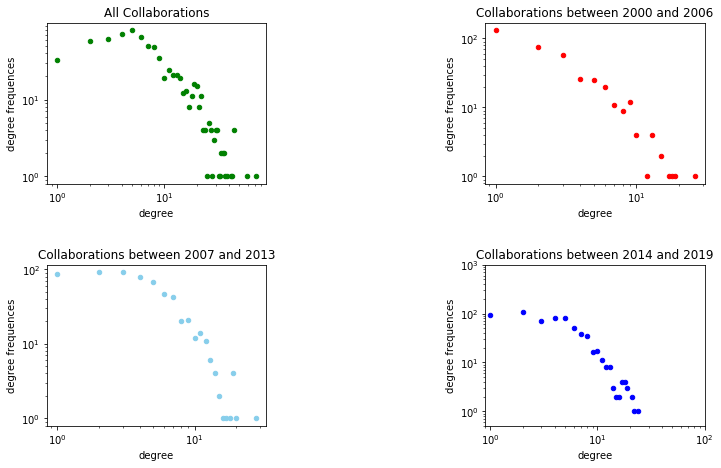

In [11]:
# the degree distribution for All collabrations,collabrations between 2000-2006, 2007-2013, 2014-2019
fig, axs = plt.subplots(2, 2, figsize=(12,7))
plt.tight_layout()

axs[0, 0].scatter(unique_degrees, frequences, s=20,color = 'green', label="collaborations_all")
axs[0, 0].set_title('All Collaborations')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log') 
plt.ylim([.5,1000])
plt.xlim([.9,100])
axs[0, 0].set_xlabel('degree')
axs[0, 0].set_ylabel('degree frequences')

axs[0, 1].scatter(unique_degrees_0006, frequences_0006, s=20, color = 'red', label="collaborations_0006")
axs[0, 1].set_title('Collaborations between 2000 and 2006')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')  
plt.ylim([.5,1000])
plt.xlim([.9,100])
axs[0, 1].set_xlabel('degree')
axs[0, 1].set_ylabel('degree frequences')


axs[1, 0].scatter(unique_degrees_0713, frequences_0713, s=20, color = 'skyblue', label="collaborations_0713")
axs[1, 0].set_title('Collaborations between 2007 and 2013')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log') 
plt.ylim([.5,1000])
plt.xlim([.9,100])
axs[1, 0].set_xlabel('degree')
axs[1, 0].set_ylabel('degree frequences')

axs[1, 1].scatter(unique_degrees_1419, frequences_1419, s=20, color = 'blue', label="collaborations_1419")
axs[1, 1].set_title('Collaborations between 2014 and 2019')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log') 
plt.ylim([.5,1000])
plt.xlim([.9,100])
axs[1, 1].set_xlabel('degree')
axs[1, 1].set_ylabel('degree frequences')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
plt.show()

In [12]:
# graphs of three network models, ER,BA and SW
G_er=nx.erdos_renyi_graph(748,0.013)
G_ba=nx.barabasi_albert_graph(748,5)
G_sw=nx.watts_strogatz_graph(748,10,0.1)

deg_er = dict(nx.degree(G_er))
degrees_er = [val for val in deg_er.values()]
unique_degrees_er, frequences_er = np.unique(degrees_er, return_counts=True)

deg_ba = dict(nx.degree(G_ba))
degrees_ba = [val for val in deg_ba.values()]
unique_degrees_ba, frequences_ba = np.unique(degrees_ba, return_counts=True)

deg_sw = dict(nx.degree(G_sw))
degrees_sw = [val for val in deg_sw.values()]
unique_degrees_sw, frequences_sw = np.unique(degrees_sw, return_counts=True)

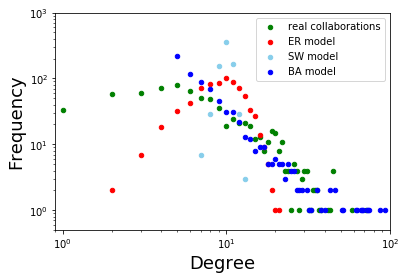

In [13]:
# the degree distribution for All collabrations network, ER,BA and SW
fig = plt.figure()
ax1 = fig.add_subplot(111)
l = ax1.scatter(unique_degrees, frequences,s=20, color = 'green', label="real collaborations")
l1 = ax1.scatter(unique_degrees_er, frequences_er, s=20, color = 'red', label="ER model")
l2 = ax1.scatter(unique_degrees_sw, frequences_sw, s=20, color = 'skyblue', label="SW model")
l3 = ax1.scatter(unique_degrees_ba, frequences_ba, s=20, color = 'blue', label="BA model")
#plot on log scale with proper x, y range for display purpose
plt.yscale('log')
plt.xscale('log')
plt.ylim([.5,1000])
plt.xlim([.9,100])
# # plt.scatter(unique_degrees, frequences,color = 'green', label="collaborations_all")
# # plt.scatter(unique_degrees1, frequences1,color = 'red', label="collaborations_bt_04_09")
# # plt.scatter(unique_degrees1, frequences1,color = 'skyblue', label="collaborations_bt_10_14")
# # plt.scatter(unique_degrees1, frequences1,color = 'blue', label="collaborations_after_14")

plt.legend(handles = [l, l1, l2, l3], loc='upper right')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.show()

### Basic parameters: LCC, $\hat{l}$, $\hat{CC}$

In [14]:
LCC = max(nx.connected_component_subgraphs(G), key = len)
LCC_node = len(LCC.nodes())
LCC_edge = len(LCC.edges())
degree = nx.degree_assortativity_coefficient(LCC)
l_hat = nx.average_shortest_path_length(LCC)
cluster_coefficient = nx.average_clustering(LCC)
print("collaborations_all have {} nodes,{} of edges. Its average shortest path and clustering coefficient is {},{}." \
.format(LCC_node, LCC_edge, l_hat, cluster_coefficient))

collaborations_all have 748 nodes,3498 of edges. Its average shortest path and clustering coefficient is 3.971418651432826,0.5156161910351506.


In [15]:
# parameter function
def basic_para(G, name):
    LCC = max(nx.connected_component_subgraphs(G), key = len)
    G_node = len(G.nodes())
    G_edge = len(G.edges())
    l_hat = nx.average_shortest_path_length(LCC)
    cluster_coefficient = nx.average_clustering(G)   
    print("{} have {} nodes,{} of edges. Its average shortest path and clustering coefficient is {},{}." \
      .format(name, len(LCC.nodes), len(LCC.edges()), l_hat, cluster_coefficient))

In [16]:
# output para
basic_para(G, "G")
basic_para(G_0006, "G_0006")
basic_para(G_0013, "G_0013" )
basic_para(G_0019, "G_0019")
basic_para(G_0713, "G_0713")
basic_para(G_1419, "G_1419")
basic_para(G_er, "G_er")
basic_para(G_sw, "G_sw")
basic_para(G_ba, "G_ba")

G have 748 nodes,3498 of edges. Its average shortest path and clustering coefficient is 3.971418651432826,0.5156161910351509.
G_0006 have 206 nodes,426 of edges. Its average shortest path and clustering coefficient is 5.313142315889178,0.37693046470168673.
G_0013 have 629 nodes,1702 of edges. Its average shortest path and clustering coefficient is 5.7268741202798905,0.5036447280817788.
G_0019 have 742 nodes,2570 of edges. Its average shortest path and clustering coefficient is 4.655979571570436,0.519741329743868.
G_0713 have 579 nodes,1406 of edges. Its average shortest path and clustering coefficient is 6.499524893773419,0.4986173627592626.
G_1419 have 605 nodes,1532 of edges. Its average shortest path and clustering coefficient is 6.237348804115812,0.49925917732926994.
G_er have 748 nodes,3704 of edges. Its average shortest path and clustering coefficient is 3.1324943266828456,0.014146627878705997.
G_sw have 748 nodes,3740 of edges. Its average shortest path and clustering coefficien

## Clustering

In [17]:
# read in nodes and add ‘Fields’，'Affiliation'，'IsWashU' attributes to nodes 
df_nodes = DataFrame(all_nodes)
# set attribute Field for nodes
d1 = df_nodes.set_index('HashId')['Fields'].to_dict()
field = {key: values for key, values in d1.items()}
nx.set_node_attributes(G, field, "Fields")

# set attribute Affiliation for nodes 
d2 = df_nodes.set_index('HashId')['Affiliation'].to_dict()
affiliation = {key: values for key, values in d2.items()}
nx.set_node_attributes(G, affiliation, "Affiliation")

# set attribute IsWashu for nodes 
d3 = df_nodes.set_index('HashId')['IsWashU'].to_dict()
IsWashU = {key: values for key, values in d3.items()}
nx.set_node_attributes(G, IsWashU, "IsWashU")

In [18]:
# rename the node with professor names instead of hash_id, rename only once, otherwise report error
# change hashid to names for nodes 
d4 = df_nodes.set_index('HashId')['Name'].to_dict()
# names = {key: values for key, values in d4.items()}
nx.relabel_nodes(G, d4, copy = False)

In [19]:
# three clustering method implementation,spectral clustering, between-based and modularity maximization clustering
# the betewwnness based clustering algorithm
def betweenness_based_clustering(g, k):
    # sanity check and early return when no clustering is required
    if k <= 0: print ("k should be a positive int")
    if k <= 1: return g, [list(g.nodes())]
    
    G = nx.Graph(g)
    
    # while the number of connected components in this graph is smaller than k, 
    # we repeatedly remove the edge of the current graph with the highest edge betweenness score
    while nx.number_connected_components(G) < k:
        max_edge_socre = -float('inf');
        # loop through each connected component in the graph and find the edge with the max score for each connected component
        for each in nx.connected_component_subgraphs(G):
            if len(each.nodes) == 1: continue  # no split for the connected graph with only one node
            edge_scores = nx.edge_betweenness_centrality(each)
            within_largest_edge = max(edge_scores, key=edge_scores.get)
            within_largest_score = edge_scores[within_largest_edge]
            # update the overall max edge betweenness score and record the edge information
            if max_edge_socre < within_largest_score:
                max_edge_socre = within_largest_score
                max_edge = within_largest_edge
        
        # remove the edge with highest betweenness score across all connected components
        G.remove_edge(*max_edge)
        
    # get the partition lists
    partitions = []
    for each in nx.connected_component_subgraphs(G):
        partitions.append(list(each.nodes()))

    return partitions

# Spectral clustering
# given a number, return the floor of the log2 of this number
# this is for determining the number of even splits. eg. 17 --> 2^4 + 1 --> return 4
def cloest_power_two(num):
    return math.floor(math.log(num, 2))

# given a list of graph, get the list of nodes for each graph
def build_partition_list(graph_list):
    return [list(nx.Graph(G).nodes()) for G in graph_list]

# given a grapg G and two disjoint sets, partition G into 2 connected components based on s1 and s2
def get_partition_nodes_based_on_Laplacian_eigenvector(G):
    f_vec = np.array(nx.fiedler_vector(G))
    s1_index = np.where(f_vec > 0)[0]; s2_index = np.where(f_vec <= 0)[0]
    s1_nodes = set(np.array(G.nodes())[s1_index]); s2_nodes = set(np.array(G.nodes())[s2_index])
    return s1_nodes, s2_nodes
    
# the spectral clustering algorithm
def spectral_clustering(g, k):
    # sanity check and early return based on parameter k
    if k <= 0: print ("k should be a positive int")
    if k <= 1: return [list(g.nodes())]
    
    # same as the modularity maximizaion, we want to perform as many even splits as possible
    even_split_num = cloest_power_two(k)
    left_over_num = k - 2**even_split_num
    
    res = [g.copy()]
    
    # we even split the graph as much as possible
    while len(res) <= 2**even_split_num:
        temp = []
        for each in res:
            if len(each.nodes) == 1: continue
            s1_nodes, s2_nodes = get_partition_nodes_based_on_Laplacian_eigenvector(each)
            temp.extend([nx.subgraph(each, s1_nodes).copy(), nx.subgraph(each, s2_nodes).copy()])
        res = temp
        
    if left_over_num == 0: return build_partition_list(res)
    
    # after max number of even splits, we further split each partition one more time
    # compute the modularity score, q, for each split and add in these splits based on the order of q and left_over_num
    res_temp = [nx.Graph(G) for G in res]; remaining = []
    for i in range(len(res_temp)):
        if len(res_temp[i].nodes) == 1: continue
        s1_nodes, s2_nodes = get_partition_nodes_based_on_Laplacian_eigenvector(res_temp[i])
        q = modularity(res_temp[i], [s1_nodes, s2_nodes])
        remaining.append(([list(s1_nodes), list(s2_nodes)], (q, i)))

    # sort the final round splits and take based on their modularity score
    add_on = sorted(remaining, key=lambda x: x[1][0])[-left_over_num:]
    expand_indicies = set([i[1][1] for i in add_on])

    # construct the partition node lists
    graphs =[]
    for index in range(len(res)):
        if index not in expand_indicies:
            graphs.append(res[index])

    partitions = build_partition_list(graphs)
    
    for (sub_lists, (_, _)) in add_on:
        for each_part in sub_lists:
            partitions.append(each_part)
        
    return partitions 

# Modualrity maximization
# given a graph G, partition based on the leading e'vector of its modularity matrix
# partition G into two sets of nodes and return these sets
def get_partition_nodes_based_on_modularity_eigenvector(G):
    values, vectors = LA.eig(nx.modularity_matrix(G, nodelist=list(G.nodes())))
    rearrangedEvalsVecs = sorted(zip(values, vectors.T), key=lambda x: x[0], reverse=True)
    leading_vec = np.array(rearrangedEvalsVecs[0][1])
    s1_index = np.where(leading_vec > 0)[1]; s2_index = np.where(leading_vec <= 0)[1]
    s1_nodes = set(np.array(G.nodes())[s1_index]); s2_nodes = set(np.array(G.nodes())[s2_index])
    return s1_nodes, s2_nodes
from numpy import linalg as LA
# clustering algorithm based on the madularity maximization approach
def modularity_max_clustering(g, k):
    # sanity check and early return
    if k <= 0: print ("k should be a positive int")
    if k <= 1: return [list(g.nodes())]
    
    # calculate the number of times requried to for even split and how many extra splits after even splits
    even_split_num = cloest_power_two(k)
    left_over_num = k - 2**even_split_num

    res = [g.copy()]
    
    # while there is no 2^(even_split_num) partitions in this graph, we partition each part into 2 groups
    # each partition would be an induced subgraph of the "parent" graph
    while len(res) < 2**even_split_num:
        temp = []
        for each in res:
            if len(list(each.nodes())) == 1: continue  # no further split
            s1_nodes, s2_nodes = get_partition_nodes_based_on_modularity_eigenvector(each)
            temp.extend([nx.subgraph(each, s1_nodes).copy(), nx.subgraph(each, s2_nodes).copy()])
        res = temp

    if left_over_num == 0: return build_partition_list(res)
    
    # after the max possible even splits, the algorithm may still not be able to get k clusters
    # so, for each partition computed above, we further split one time and only add
    # k - 2**even_split_num of new subgraphs in the graph based on the order of modularity
    res_temp = [nx.Graph(G) for G in res]; remaining = []
    for i in range(len(res_temp)):
        if len(list(res_temp[i].nodes())) == 1: continue
        s1_nodes, s2_nodes = get_partition_nodes_based_on_modularity_eigenvector(res_temp[i])
        q = modularity(res_temp[i], [s1_nodes, s2_nodes])
        remaining.append(([list(s1_nodes), list(s2_nodes)], (q, i)))

    # sort the last round splits based on the modularity score and only take the largest left_over_num of splits
    add_on = sorted(remaining, key=lambda x: x[1][0])[-left_over_num:]
    expand_indicies = set([i[1][1] for i in add_on])
    
    # construct the partition node lists
    graphs =[]
    for index in range(len(res)):
        if index not in expand_indicies:
            graphs.append(res[index])

    partitions = build_partition_list(graphs)
    
    for (sub_lists, (_, _)) in add_on:
        for each_part in sub_lists:
            partitions.append(each_part)
        
    return partitions 


In [20]:
# iswashu_grpah has 21 connected components
iswashu_value = np.array(df_nodes['IsWashU'].values)
iswashu_index = np.where(iswashu_value == 'Y')[0]
print(len(iswashu_index)) 
washu_nodes = df_nodes['HashId'].loc[iswashu_index].values.tolist()
subgraph_washu = nx.subgraph(LCC, washu_nodes)
print(nx.number_connected_components(G))

82
1


In [21]:
# subgraphs for clustering when k = 2
G_spectral = spectral_clustering(G, 2)
subgraph_spectral1 = nx.subgraph(G, G_spectral[0])
subgraph_spectral2 = nx.subgraph(G, G_spectral[1])
G_spectral_mod = modularity(G,G_spectral)

G_mod_max = modularity_max_clustering(G,2)
subgraph_mod_max1 = nx.subgraph(G, G_mod_max[0])
subgraph_mod_max2 = nx.subgraph(G, G_mod_max[1])
G_mod_max_mod = modularity(G,G_mod_max)
print("G_spectral’s and G_mod_max‘s modularity are {}, {} respectively" \
       .format(G_spectral_mod, G_mod_max_mod))

G_spectral’s and G_mod_max‘s modularity are 0.42662208184988265, 0.3541302781531833 respectively


In [22]:
# def spec_mod(G):
#     spec_mod = []
#     for i in range(3,6):
#         G_spectral = spectral_clustering(G, i)
#         G_spectral_mod = modularity(G,G_spectral)
#         spec_mod.append(G_spectral_mod)
#     return spec_mod

In [23]:
# def mod_max_mod(G):
#     mod_max_mod = []
#     for i in range(3,6):
#         G_mod_max = modularity_max_clustering(G,i)
#         G_mod_max_mod = modularity(G,G_mod_max)
#         mod_max_mod.append(G_mod_max_mod)
#     return mod_max_mod

In [24]:
# Wed 11/12/2019
# using modularity_max_clustering to make G into 10 clusters
k = 10
cluster_res = modularity_max_clustering(G,k)

In [25]:
# calculate the top 5 words for each cluster's fields
for i in range(k):
    sub_graph = nx.subgraph(G, cluster_res[i])
    fields = list(nx.get_node_attributes(sub_graph, 'Fields').values())
    all_words = np.concatenate(list(map(lambda x: np.array(list(map(lambda s: s.lower(), str(x).split(', ')))), fields)))
    u, counts = np.unique(all_words,return_counts=True)
    sort_freq = sorted(list(zip(u, counts)), key=lambda x: x[1], reverse=True)
    cc = 0
    top_words = []
    while len(top_words) < 5:
        if sort_freq[cc][0] != 'nan':
            top_words.append(sort_freq[cc][0])
        cc += 1
    print("{} {}".format(i, top_words))
    
    coverage = 0
    for each_person in fields:
        inter = len(np.intersect1d(np.array(top_words), np.array(str(each_person).split(', '))))
        if inter > 0: coverage += 1
    print (coverage / len(fields))
    

0 ['artificial intelligence', 'machine learning', 'biomechanics', 'computational biology', 'biomedical optics']
0.046296296296296294
1 ['information theory', 'coding theory', 'machine learning', 'communications', 'signal processing']
0.26666666666666666
2 ['networking', 'security', 'cloud computing', 'computer science', 'network economics']
0.15217391304347827
3 ['networking', 'data mining', 'machine learning', 'security', 'artificial intelligence']
0.15384615384615385
4 ['real-time systems', 'cyber-physical systems', 'computer architecture', 'scheduling', 'distributed systems']
0.16176470588235295
5 ['robotics', 'artificial intelligence', 'control', 'machine learning', 'computer graphics']
0.16666666666666666
6 ['biogeochemistry', 'materials science', 'tissue engineering', 'biomaterials', 'electron microscopy']
0.06306306306306306
7 ['photonics', 'nonlinear optics', 'sensing', 'silicon photonics', 'laser']
0.07317073170731707
8 ['machine learning', 'computational imaging', 'biomedical

In [26]:

# add  one odes with the 
p_dict = dict([(node, str(index)) for index, p in enumerate(cluster_res) for node in p])
nx.set_node_attributes(G, p_dict, 'cluster10')
nx.write_gml(G, "top_5_cluster.gml")

In [27]:
# print length for each cluster
print(len(cluster_res[0]))
print(len(cluster_res[1]))
print(len(cluster_res[2]))
print(len(cluster_res[3]))
print(len(cluster_res[4]))
print(len(cluster_res[5]))
print(len(cluster_res[6]))
print(len(cluster_res[7]))
print(len(cluster_res[8]))
print(len(cluster_res[9]))

324
30
46
39
68
24
111
41
23
42


In [28]:
sub_graph = nx.subgraph(G, cluster_res[0])

In [29]:

fields = list(nx.get_node_attributes(sub_graph, 'Fields').values())

In [30]:
# get the Fields attribute of every node in the cluster
all_words = np.concatenate(list(map(lambda x: np.array(list(map(lambda s: s.lower(), str(x).split(', ')))), fields)))


In [31]:
#get unique word xsand get each word's count
u, counts = np.unique(all_words,return_counts=True)

In [32]:
# get the sorted list for each field and count
tt = sorted(list(zip(u, counts)), key=lambda x: x[1], reverse=True) 
print(tt)

[('artificial intelligence', 30), ('machine learning', 23), ('nan', 20), ('biomechanics', 14), ('computational biology', 11), ('biomedical optics', 10), ('computer vision', 10), ('human-computer interaction', 10), ('biomaterials', 9), ('biomedical engineering', 9), ('tissue engineering', 9), ('applied mathematics', 7), ('computer graphics', 7), ('biophysics', 6), ('drug delivery', 6), ('game theory', 6), ('multiagent systems', 6), ('solid mechanics', 6), ('visual analytics', 6), ('algorithms', 5), ('electrochemistry', 5), ('environmental engineering', 5), ('information visualization', 5), ('multi-agent systems', 5), ('osteoarthritis', 5), ('robotics', 5), ('bioengineering', 4), ('bioinformatics', 4), ('collective behaviour', 4), ('computational game theory', 4), ('computational mathematics', 4), ('computer architecture', 4), ('human computer interaction', 4), ('hydrogels', 4), ('imaging', 4), ('nanotechnology', 4), ('optical coherence tomography', 4), ('soft matter', 4), ('ultrasound',

In [33]:
# the funtion used to calculate degree and attribute_assortativity_coefficient
# the attribute 'fields' is useless now
def Coefficient(G):
    degree = nx.degree_assortativity_coefficient(G)
#   Fields = nx.attribute_assortativity_coefficient(G, "Fields")
    Affiliation = nx.attribute_assortativity_coefficient(G, "Affiliation")
    IsWashU = nx.attribute_assortativity_coefficient(G, "IsWashU")
    print("Its degree_assortativity_coefficient is {}.\n"
          "And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are {},{} respectively."\
          .format(degree, Affiliation, IsWashU))

In [34]:
# get the assortativity_coefficient for the cluster
Coefficient(subgraph_spectral1)
Coefficient(subgraph_spectral2)
Coefficient(subgraph_mod_max1)
Coefficient(subgraph_mod_max2)

Its degree_assortativity_coefficient is -0.48852194925493275.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.27272727272727265,-0.27272727272727265 respectively.
Its degree_assortativity_coefficient is -0.5618077093486923.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.0009813542688911251,-0.16571428571428598 respectively.
Its degree_assortativity_coefficient is 0.03515004156358425.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.028611904596020355,-0.009841235515669738 respectively.
Its degree_assortativity_coefficient is -0.022753118007746834.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.0036743290532863567,-0.01435793731041459 respectively.


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Spectral clustering')

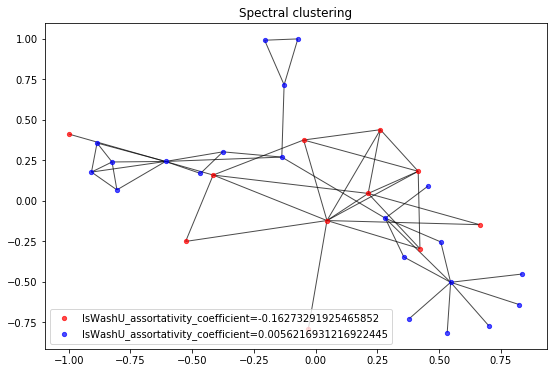

In [35]:

# spectral graph k =2, draw_networkx_edges(), draw_networkx_nodes()
# subgraph_G_spectral = nx.subgraph(G, G_spectral)
fig, ax = plt.subplots(figsize=(9,6))
pos1 = nx.spring_layout(subgraph_spectral1)
pos2 = nx.spring_layout(subgraph_spectral2)

nx.draw_networkx_nodes(subgraph_spectral1,pos=pos1,node_size=18, nodelist= subgraph_spectral1.nodes(), node_color='red',alpha=0.7,label= 'IsWashU_assortativity_coefficient=-0.16273291925465852')
nx.draw_networkx_nodes(subgraph_spectral2,pos=pos2,node_size=18,nodelist= subgraph_spectral2.nodes(), node_color='blue',alpha=0.7,label= 'IsWashU_assortativity_coefficient=0.0056216931216922445')
nx.draw_networkx_edges(subgraph_spectral1,pos=pos1,edge_color='black',alpha=0.7)
nx.draw_networkx_edges(subgraph_spectral2,pos=pos2,edge_color='black',alpha=0.7)

# # nx.draw_networkx_nodes(G,pos=pos,nodelist=rednodes, node_color='red', label='red nodes')

# nx.draw_networkx(subgraph_spectral1,pos1,ax, node_size=15,node_color='b',width=2,with_labels = False,label= 'IsWashU_assortativity_coefficient=-0.16273291925465852', alpha=0.8)
# nx.draw_networkx(subgraph_spectral2,pos2,ax, node_size=15,width=2,with_labels = False, alpha=0.8)
# plt.text(1, 1, "test", size=10, ha="right", va="top",bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
# plt.text(0.5, 0.4, "test", size=10, ha="right", va="top",bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
# plt.legend(handles=[l1,l2], labels=['IsWashU_assortativity_coefficient=-0.16273291925465852','down'],  loc='best')
plt.legend()
plt.title('Spectral clustering')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Modularity maximization clustering')

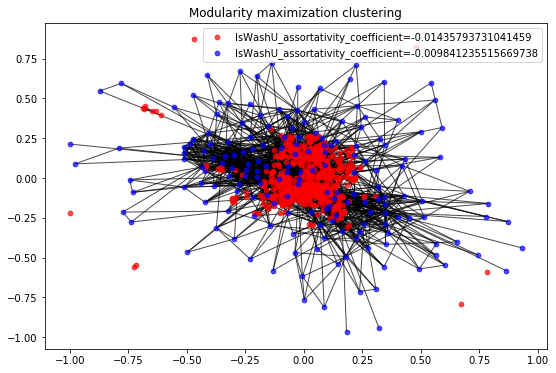

In [36]:
# modularity maximization graph k =2, draw_networkx_edges(), draw_networkx_nodes()
# subgraph_G_spectral = nx.subgraph(G, G_spectral)
fig, ax = plt.subplots(figsize=(9,6))
pos1 = nx.spring_layout(subgraph_mod_max1)
pos2 = nx.spring_layout(subgraph_mod_max2)

nx.draw_networkx_nodes(subgraph_mod_max1,pos=pos1,node_size=22, nodelist= subgraph_mod_max1.nodes(), node_color='red',alpha=0.7,label= 'IsWashU_assortativity_coefficient=-0.01435793731041459')
nx.draw_networkx_nodes(subgraph_mod_max2,pos=pos2,node_size=22,nodelist= subgraph_mod_max2.nodes(), node_color='blue',alpha=0.7,label= 'IsWashU_assortativity_coefficient=-0.009841235515669738')
nx.draw_networkx_edges(subgraph_mod_max1,pos=pos1,edge_color='black',alpha=0.7)
nx.draw_networkx_edges(subgraph_mod_max2,pos=pos2,edge_color='black',alpha=0.7)

# # nx.draw_networkx_nodes(G,pos=pos,nodelist=rednodes, node_color='red', label='red nodes')

# nx.draw_networkx(subgraph_spectral1,pos1,ax, node_size=15,node_color='b',width=2,with_labels = False,label= 'IsWashU_assortativity_coefficient=-0.16273291925465852', alpha=0.8)
# nx.draw_networkx(subgraph_spectral2,pos2,ax, node_size=15,width=2,with_labels = False, alpha=0.8)
# plt.text(1, 1, "test", size=10, ha="right", va="top",bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
# plt.text(0.5, 0.4, "test", size=10, ha="right", va="top",bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
# plt.legend(handles=[l1,l2], labels=['IsWashU_assortativity_coefficient=-0.16273291925465852','down'],  loc='best')
plt.legend()
plt.title('Modularity maximization clustering')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Modulaity maximizaton clustering')

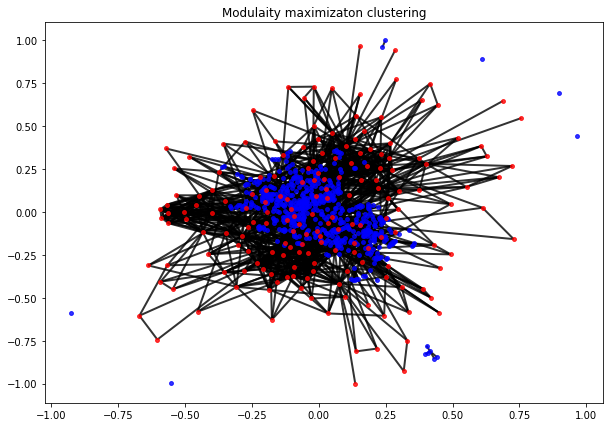

In [37]:


# modularity maximization graph k =2, draw_networkx directly 
fig, ax = plt.subplots(figsize=(10,7))
pos1 = nx.spring_layout(subgraph_mod_max1)
pos2 = nx.spring_layout(subgraph_mod_max2)
nx.draw_networkx(subgraph_mod_max1,pos1,ax, node_size=15,node_color='b',width=2,with_labels = False,alpha=0.8)
nx.draw_networkx(subgraph_mod_max2,pos2,ax, node_size=15,width=2,with_labels = False, alpha=0.8)
plt.title('Modulaity maximizaton clustering')


### In-WashU sample dataset

In [46]:
# In-WashU node_list washu_nodes
# df_nodes['HashId'].loc[iswashu_index]
washu_nodes = df_nodes[(df_nodes.IsWashU == 'Y')]
washu_sample_nodes = washu_nodes.to_csv(path_or_buf= './washu_sample_nodes.csv') 

In [47]:
len(washu_nodes)

82

In [48]:
# In-WashU edge_list washu_sample
washu_sample_id = washu_nodes['HashId']
washu_sample_ID = washu_sample_id.tolist()
washu_sample_df = df_all_edges
rows = []
for i in range(len(df_all_edges)):
    if (washu_sample_df['Id1'][i] in washu_sample_ID and washu_sample_df['Id2'][i] in washu_sample_ID) == False:
        rows.append(i)
washu_sample = washu_sample_df.drop(rows)
washu_sample_edges = washu_sample.to_csv(path_or_buf= './washu_sample_edges.csv') 

In [49]:
len(washu_sample)

102

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


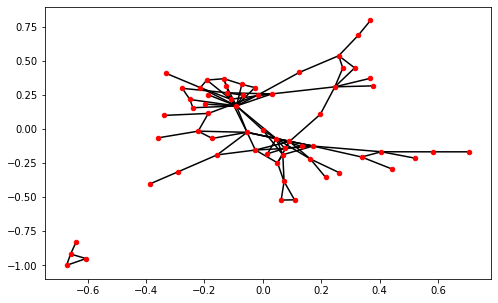

In [50]:
# generate graph using edgelist washu_sample
G_washu_sample = nx.from_pandas_edgelist(washu_sample,'Id1','Id2',edge_attr= 'Count')
fig, ax = plt.subplots(figsize=(8,5))
pos = nx.spring_layout(G_washu_sample)
nx.draw_networkx(G_washu_sample, pos,ax, node_size=20,width=1.5,with_labels = False)

In [51]:
# set attribute Field for nodes
d1 = washu_nodes.set_index('HashId')['Fields'].to_dict()
field = {key: values for key, values in d1.items()}
nx.set_node_attributes(G_washu_sample, field, "Fields")

# set attribute Affiliation for nodes 
d2 = washu_nodes.set_index('HashId')['Affiliation'].to_dict()
affiliation = {key: values for key, values in d2.items()}
nx.set_node_attributes(G_washu_sample, affiliation, "Affiliation")

# set attribute IsWashu for nodes 
d3 = washu_nodes.set_index('HashId')['IsWashU'].to_dict()
IsWashU = {key: values for key, values in d3.items()}
nx.set_node_attributes(G_washu_sample, IsWashU, "IsWashU")

### In-WashU LCC

In [52]:
# get the lcc of in-washu network
in_washu_lcc = max(nx.connected_component_subgraphs(G_washu_sample), key = len)

In [53]:
# lcc 59 nodes, 98 edges
nx.get_node_attributes(in_washu_lcc, 'Fields')
len(in_washu_lcc)

59

In [54]:
# in_washu_lcc to cvs
nodes_data = in_washu_lcc.nodes(data=True)
data={}
in_washu_lcc_edgelist = nx.to_pandas_edgelist(in_washu_lcc)
data['id']=[x[0] for x in nodes_data]
data['Fields'] = [x[1]['Fields'] for x in nodes_data]
data['Affiliation'] = [x[1]['Affiliation'] for x in nodes_data]
in_washu_lcc_nodelist = pd.DataFrame(data)
washu_59_edges = in_washu_lcc_edgelist.to_csv(path_or_buf= './washu_59_edges.csv') 
washu_59_nodes = in_washu_lcc_nodelist.to_csv(path_or_buf= './washu_59_nodes.csv') 

In [55]:
# after splitting the graph with spectral clustering to see the affiliation attribute of each cluster
G_washu_sample_lcc = max(nx.connected_component_subgraphs(G_washu_sample), key = len)
G_washu_lcc_spec = spectral_clustering(G_washu_sample_lcc, 5)
G_washu_subgraph_spec1 = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[0])
G_washu_subgraph_spec2 = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[1])
G_washu_subgraph_spec3 = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[2])
G_washu_subgraph_spec4 = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[3])
G_washu_subgraph_spec5 = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[4])
print(nx.get_node_attributes(G_washu_subgraph_spec1, 'Affiliation'))
print(nx.get_node_attributes(G_washu_subgraph_spec2, 'Affiliation'))
print(nx.get_node_attributes(G_washu_subgraph_spec3, 'Affiliation'))
print(nx.get_node_attributes(G_washu_subgraph_spec4, 'Affiliation'))
print(nx.get_node_attributes(G_washu_subgraph_spec5, 'Affiliation'))

{'HRSDO6IAAAAJ': 'CS', 'DWKoeW0AAAAJ': 'CS'}
{'ptI-HHkAAAAJ': 'CS', 'gwB_pJcAAAAJ': 'CS', 'G7D5O-0AAAAJ': 'CS', '3-y3qmkAAAAJ': 'ESE', '0v5utcwAAAAJ': 'CS'}
{'yepPD_cAAAAJ': 'CS', 'vuKTnnsAAAAJ': 'CS', 'NByrsK0AAAAJ': 'CS', 'CUkAtC4AAAAJ': 'CS', '0pp-L_IAAAAJ': 'ESE', '8Kk2MugAAAAJ': 'ESE', 'qfSkqSUAAAAJ': 'CS', 'yQXfAWMAAAAJ': 'CS'}
{'A4D_M_EAAAAJ': 'ECE', 'sMSUuY8AAAAJ': 'ECE', 'emsMY_sAAAAJ': 'ECE', 'c79hBb0AAAAJ': 'ECE', 'WwadVmIAAAAJ': 'ESE', '1qqf7D0AAAAJ': 'MEMS', 'amDW89cAAAAJ': 'ECE', 'DYZsiAIAAAAJ': 'MEMS', 'RBQ_K40AAAAJ': 'ESE', 'tyYtUNIAAAAJ': 'ECE', 'ggKzpqIAAAAJ': 'ECE', 'vzxeLyIAAAAJ': 'ECE', 'VdzVqCwAAAAJ': 'BME', 'yC-70wMAAAAJ': 'ECE', '0HhpXIwAAAAJ': 'MEMS', 'kBiBksMAAAAJ': 'ECE', 'DrUwvK0AAAAJ': 'BME'}
{'tfQuPyEAAAAJ': 'BME', '3ro8yF4AAAAJ': 'BME', 'XfYRqF4AAAAJ': 'BME'}


In [57]:
# define function to get ‘Affiliation’ assortativity_coefficient for subgraphs after clustering 
def washu_lcc_spec(G,k):
    G_washu_subgraph_spec = []
    G_washu_lcc_spec = spectral_clustering(G_washu_sample_lcc, k)
    for i in range(k):
        G_washu_subgraph = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[i])
        G_washu_subgraph_spec.append(G_washu_subgraph)
        Coefficient(G_washu_subgraph)
        
def washu_lcc_mod(G,k):
    G_washu_subgraph_spec = []
    G_washu_lcc_spec = modularity_max_clustering(G_washu_sample_lcc, k)
    for i in range(k):
        G_washu_subgraph = nx.subgraph(G_washu_sample_lcc, G_washu_lcc_spec[i])
        G_washu_subgraph_spec.append(G_washu_subgraph)
        Coefficient(G_washu_subgraph)

In [58]:
#get assortativity_coefficient 
washu_lcc_mod(G_washu_sample_lcc,3)
washu_lcc_mod(G_washu_sample_lcc,4)
washu_lcc_mod(G_washu_sample_lcc,5)

Its degree_assortativity_coefficient is 0.18620249121686383.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.2547528517110263,nan respectively.
Its degree_assortativity_coefficient is -0.46666666666666645.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.33333333333333354,nan respectively.
Its degree_assortativity_coefficient is -0.4066374908825677.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.07438016528925627,nan respectively.
Its degree_assortativity_coefficient is -0.46666666666666645.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.33333333333333354,nan respectively.
Its degree_assortativity_coefficient is -0.4066374908825677.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.07438016528925627,nan respectively.
Its degree_assortativity_coefficient is 0.054545454545455584.
And its attribute_assortativity_coeffici

/anaconda3/lib/python3.7/site-packages/networkx/algorithms/assortativity/correlation.py:265: RuntimeWarning: invalid value encountered in true_divide
  r = (t - s) / (1 - s)


In [ ]:
def sin_coefficient(G):
    degree = nx.degree_assortativity_coefficient(G)
    Affiliation = nx.attribute_assortativity_coefficient(G, "Affiliation")
    return Affiliation

In [59]:
washu_lcc_mod(G_washu_sample_lcc,3)

Its degree_assortativity_coefficient is 0.18620249121686383.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.2547528517110263,nan respectively.
Its degree_assortativity_coefficient is -0.46666666666666645.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are -0.33333333333333354,nan respectively.
Its degree_assortativity_coefficient is -0.4066374908825677.
And its attribute_assortativity_coefficient for 'Affiliation' and 'IsWashU' are 0.07438016528925627,nan respectively.


/anaconda3/lib/python3.7/site-packages/networkx/algorithms/assortativity/correlation.py:265: RuntimeWarning: invalid value encountered in true_divide
  r = (t - s) / (1 - s)


In [ ]:
modularity(G_washu_sample_lcc,G_washu_lcc_spec)

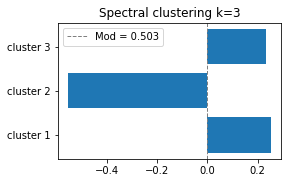

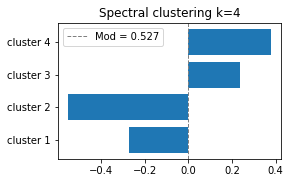

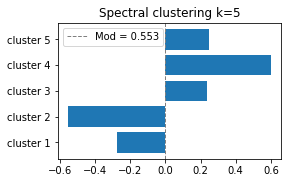

In [60]:
# plot bar charts after using spectral clustering for attribute assortativity coefficients of each clusters when k = 3, 4, 5
name_list = ['cluster 1','cluster 2','cluster 3']
num_list = [0.2529182879377434,-0.5533980582524269,0.23429710867397807]
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.subplots(figsize=(4,2.5))
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list)
plt.title("Spectral clustering k=3")
plt.legend(['Mod = 0.503'])
plt.show()

name_list = ['cluster 1','cluster 2','cluster 3','cluster 4']
num_list = [-0.27272727272727265,-0.5533980582524269,0.23429710867397807,0.3783303730017758]
plt.subplots(figsize=(4,2.5))
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list)
plt.title("Spectral clustering k=4")
plt.legend(['Mod = 0.527'], loc ='upper left')
plt.show()

name_list = ['cluster 1','cluster 2','cluster 3','cluster 4', 'cluster 5']
num_list = [-0.27272727272727265,-0.5533980582524269,0.23429710867397807,0.5999999999999999,0.24999999999999967]
plt.subplots(figsize=(4,2.5))
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list)
plt.title("Spectral clustering k=5")
plt.legend(['Mod = 0.553'], loc ='upper left')
plt.show()

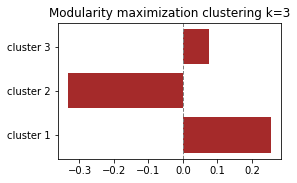

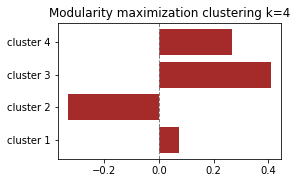

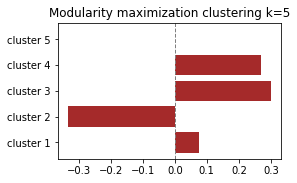

In [61]:
# plot bar charts after using Modularity maximization clustering for attribute assortativity coefficients of each clusters when k = 3, 4, 5
name_list = ['cluster 1','cluster 2','cluster 3']
num_list = [0.2547528517110263, -0.33333333333333354,0.07438016528925573]
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.subplots(figsize=(4,2.5))
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list,color = 'brown')
plt.title("Modularity maximization clustering k=3")
plt.show()

name_list = ['cluster 1','cluster 2','cluster 3','cluster 4']
num_list = [0.07438016528925573,-0.33333333333333354,0.4090909090909095,0.2676056338028171]
plt.subplots(figsize=(4,2.5))
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list,color = 'brown')
plt.title("Modularity maximization clustering k=4")
plt.show()

name_list = ['cluster 1','cluster 2','cluster 3','cluster 4', 'cluster 5']
num_list = [0.07438016528925573,-0.33333333333333354,0.29999999999999993,0.2676056338028171,0]
plt.subplots(figsize=(4,2.5))
# pl.axhline(y=0.0,c="gray",ls="--",lw=1)
plt.axvline(x=0.0,c="gray",ls="--",lw=1)
plt.barh(range(len(num_list)), num_list,tick_label = name_list,color = 'brown')
plt.title("Modularity maximization clustering k=5")
plt.show()

In [62]:
# read the csv file include in-washu cs department authors' name and their title
title_path = '/Users/hanzheyu/Desktop/CSE416-project1/CS_title.txt'
cs_title = pd.read_csv(title_path, sep=',',names=['cs_professor','title'])

In [63]:
# get values of cs_professors and titles
cs_profs = cs_title['cs_professor'].values
cs_profs_title = cs_title['title'].values

In [64]:
cs_list_with_title = list(zip(cs_profs, cs_profs_title))

In [65]:
# construct network of in-washu cs professors and their neighbors
all_profs = []
for prof in cs_profs:
    if G.has_node(prof):
        all_profs.extend(list(G.neighbors(prof)))

In [66]:
len(all_profs)

632

In [67]:
cs_profs_with_N = np.union1d(np.array(cs_profs), np.array(all_profs)) 

cs_profs_subgraph = G.subgraph(cs_profs_with_N)

In [68]:
cs_profs = set(cs_profs)
for node in list(cs_profs_subgraph.nodes()):
    if node in cs_profs:
        nx.set_node_attributes(cs_profs_subgraph, {node: 'Y'}, 'isWashUCS')
    else:
        nx.set_node_attributes(cs_profs_subgraph, {node: 'N'}, 'isWashUCS')

In [69]:
# p_dict = dict([(node, str(index)) for index, p in enumerate(cluster_res) for node in p])
# nx.set_node_attributes(G, p_dict, 'cluster10')
# nx.write_gml(..., "top_5_cluster.gml")
nx.write_gml(cs_profs_subgraph, "washUCS_network.gml")

In [70]:
len(cs_profs_subgraph.nodes())

369

In [71]:
# construct statistics as an array to store some measure for in-washu authors with different titles
statistics = {}

edges_list = list(cs_profs_subgraph.edges(data=True))
edges_set = {x[0] + ' ' + x[1]: x[2] for x in edges_list}
    
for node in list(cs_profs):
    if not G.has_node(node): continue
    neighbors = cs_profs_subgraph.neighbors(node)
    cur_sub = cs_profs_subgraph.subgraph(neighbors)
    
    neighbors_list = list(cs_profs_subgraph.nodes(data=True))
    neighbors_set = {x[0]: x[1] for x in neighbors_list}

    numY = 0 # num of InWashU connections in SUB-communities
    numN = 0 # num of out washU connections in SUB-communities
    in_weight = 0 # total collaborations with inWashU Prof in SUB-communities.
    out_weight = 0 # total collaborations with outWashU Prof in SUB-communities.

    for eachN in neighbors_list:
        pair1 = node + ' ' + eachN[0]
        pair2 = eachN[0] + ' ' + node

        if pair1 in edges_set:
            if neighbors_set[eachN[0]]['isWashUCS'] == 'Y':
                in_weight += edges_set[pair1]['Count']
                numY += 1
            else:
                out_weight += edges_set[pair1]['Count']
                numN += 1
        elif pair2 in edges_set:
            if neighbors_set[eachN[0]]['isWashUCS'] == 'Y':
                in_weight += edges_set[pair2]['Count']
                numY += 1
            else:
                out_weight += edges_set[pair2]['Count']
                numN += 1
                
    total_weight = in_weight + out_weight
    neighbos_num = numY + numN
    
    if numY == 0:
        stat1 = 0
        stat2 = 0
    elif numN == 0:
        stat1 = 1
        stat2 = 1
    else:
        stat1 = numY / numN
        stat2 = in_weight / out_weight
        
    
    statistics[node] = np.array([neighbos_num, total_weight, stat1, stat2])
#     statistics = np.vstack((statistics, np.array([node,neighbos_num, stat1, stat2])))
    

In [72]:
# take out the professors with different title into the list 
asso_prof = set(cs_title.loc[cs_title['title'] == 'Associate Professor']['cs_professor'].values.tolist())
prof = set(cs_title.loc[cs_title['title'] == 'Professor']['cs_professor'].values.tolist())
assi_prof = set(cs_title.loc[cs_title['title'] == 'Assistant Professor']['cs_professor'].values.tolist())
lect = set(cs_title.loc[cs_title['title'] == 'Lecturer']['cs_professor'].values.tolist())
senior_prof = set(cs_title.loc[cs_title['title'] == 'Senior Professor']['cs_professor'].values.tolist())

In [73]:
# aaccumulate degree, total papers, in washu subgraph people ratio, in washu subgraph paper ratio with differnet titles
ph = [0, 0, 0, 0]
asso_stats = np.array(ph, dtype='float64')
prof_stats = asso_stats.copy()
assi_stats = asso_stats.copy()
lect_stats = asso_stats.copy()
senior_stats = asso_stats.copy()

for k, v in statistics.items():
    if k in asso_prof: asso_stats += v
    if k in prof: prof_stats += v
    if k in assi_prof: assi_stats += v
    if k in lect: lect_stats += v
    if k in senior_prof: senior_stats += v


In [74]:
# get the average statistics
asso_final = asso_stats / len(list(asso_prof))
prof_final = prof_stats / len(list(prof))
assi_final = assi_stats / len(list(assi_prof))
lect_final = lect_stats / len(list(lect))
senior_prof_final = senior_stats / len(list(senior_prof))

In [75]:
# print avg degree, avg total papers, avg in washu subgraph people ratio, avg in washu subgraph paper ratio with differnet titles
print (lect_final)
print (assi_final)
print (asso_final)
print (prof_final)
print (senior_prof_final)

[ 3.5   20.     0.2    0.125]
[1.27272727e+01 5.08181818e+01 5.04329004e-02 5.91864641e-02]
[17.8        85.4         0.14852941  0.26776676]
[ 25.44444444 165.33333333   0.19437594   0.36040502]
[31.         87.          0.10714286  0.20833333]
